<a href="https://colab.research.google.com/github/RafiMM0609/clean-fill-and-get-data-relation-using-python/blob/main/clean%2Cfill%2Candrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import pacf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense
from statsmodels.tsa.stattools import pacf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#data-new
df_new = pd.read_csv('drive/MyDrive/Data/data-new.csv')

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [ ]:
# Inisialisasi koneksi Firebase
cred = credentials.Certificate("pathto=privatkey.json")
firebase_admin.initialize_app(cred, {
    'databaseURL': 'yourlinkfirebase'
})


In [ ]:
# Dapatkan referensi ke database Firebase
ref = db.reference('/')

In [ ]:
data = ref.child('firebasepath').get()

In [ ]:
import pandas as pd

# Membuat dataframe dari data
df = pd.DataFrame.from_dict(data, orient='index')
# Menyesuaikan kolom dan baris jika diperlukan
# df = df.rename(columns={'old_column_name': 'new_column_name'})
# df = df.transpose()

In [ ]:
# Mengubah kolom 'col1' menjadi float
df['k'] = df['k'].astype(float)
df['n'] = df['n'].astype(float)
df['p'] = df['p'].astype(float)
df['ph'] = df['ph'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df['moisture'] = df['moisture'].astype(float)
df['Temperature'] = df['Temperature'].astype(float)

# Mengubah kolom 'col2' menjadi datetime64
#df['n'] = pd.to_datetime(df['n'])

In [ ]:
from datetime import datetime
import pytz

# Mendefinisikan format datetime yang sesuai dengan format timestamp
format_str = "%Y-%m-%dT%H:%M:%S"

# Mengubah setiap elemen dalam Series menjadi objek datetime dengan menggunakan format yang sudah didefinisikan
data = df.Timestamp.apply(lambda x: datetime.strptime(x, format_str))

# Menentukan timezone WIB menggunakan library pytz
#timezone_str = "Asia/Jakarta"
#timezone_obj = pytz.timezone(timezone_str)

# Mengubah timezone dari setiap elemen objek datetime sesuai dengan timezone yang sudah ditentukan
# date_time = data.apply(lambda x: timezone_obj.localize(x))

In [ ]:
df['Timestamp'] = data
#df['Timestamp] = date_time

In [ ]:
# Mengatur kolom "Timestamp" sebagai indeks DataFrame
df.set_index('Timestamp', inplace=True)

In [ ]:
#Check nilai NaN
df.isna().sum()

Humidity       722
Temperature    722
jam              0
k                0
moisture         0
n                0
p                0
ph               0
tamp             0
dtype: int64

In [ ]:
# Menghilangkan tiga kolom
columns_to_drop = ['Temperature', 'Humidity', 'jam']
df = df.drop(columns=columns_to_drop)

In [ ]:
import math
# Mendeteksi nilai float 0.0 menggunakan math.isnan()
mask = df['moisture'].apply(lambda x: math.isnan(x) or x == 0.0)

# Menampilkan baris yang memiliki nilai float 0.0
result = df[mask]
print(result)

In [ ]:
import pandas as pd
# Menghapus baris dengan nilai float 0.0
df = df[(df != 0.0).all(axis=1)]

In [ ]:
# Menghapus baris dengan timestamp di bawah tahun 2020
df_filtered_down = df[df.index.year > 2022]
df_filtered_up = df_filtered_down[df_filtered_down.index.year < 2025]

# Menampilkan DataFrame setelah penghapusan
df = df_filtered_up

In [ ]:
# Mengubah data per menit menjadi per jam dengan metode resample()
df_hourly = df.resample('H').mean()
df = df_hourly

In [ ]:
#Check nilai NaN
df.isna().sum()

k           127
moisture    127
n           127
p           127
ph          127
dtype: int64

In [ ]:
# Menghapus baris yang mengandung NaN pada kolom 'col1'
df = df.dropna(subset=['k'])

In [ ]:
import pandas as pd
counter = 0

# Buat rentang waktu per jam
hourly_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')

# Temukan timestamp per jam yang hilang
missing_timestamps = hourly_range[~hourly_range.isin(df.index)]

# Tambahkan missing_timestamps sebagai index baru pada data frame
df = df.reindex(df.index.union(missing_timestamps))

for item in missing_timestamps:
    print(item)
    counter += 1

# Tampilkan daftar timestamp per jam yang hilang
#print(counter)

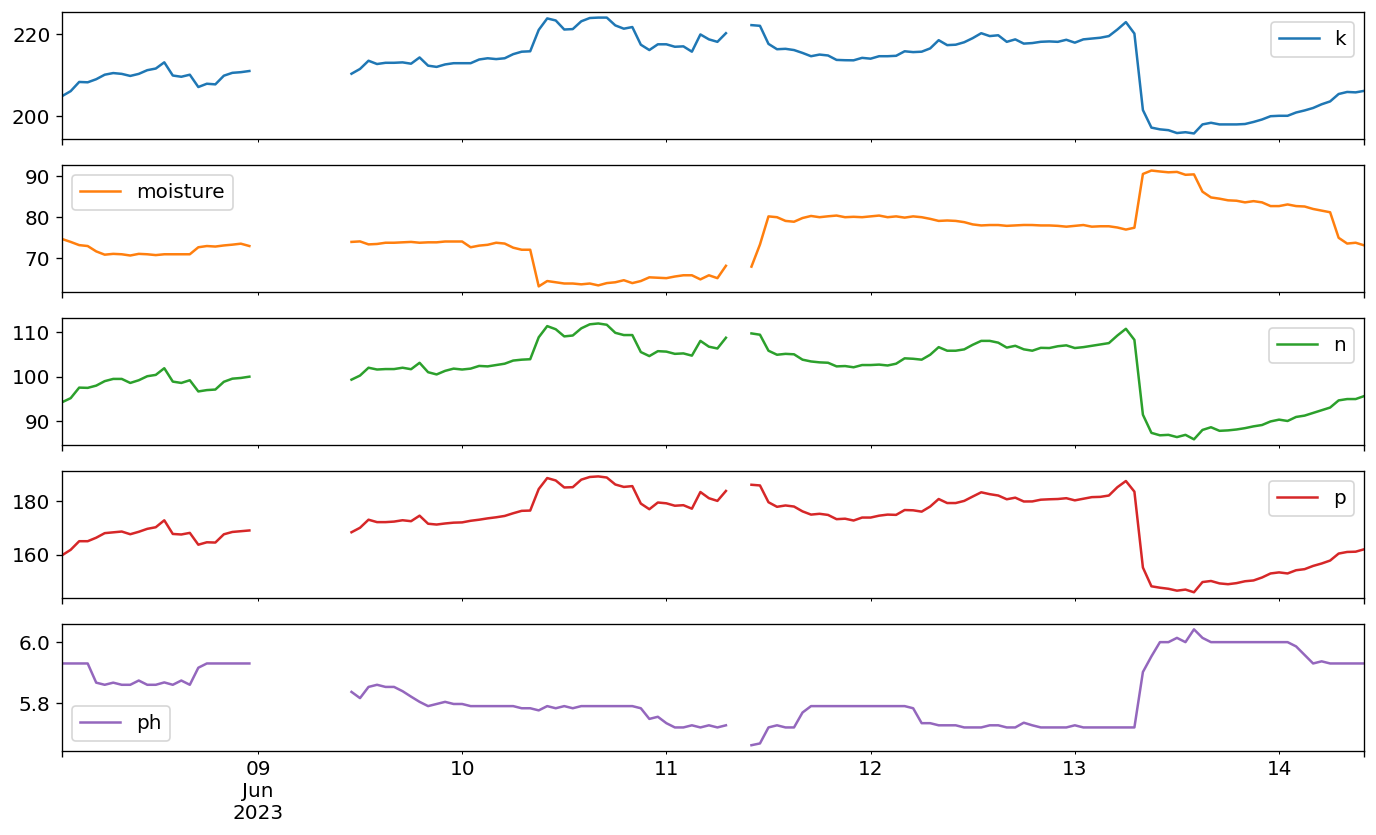

<Figure size 960x2880 with 0 Axes>

In [ ]:
import pandas as pd

# Menghitung jumlah baris untuk masing-masing proporsi
proporsi_1 = 0.57
proporsi_2 = 0.1
total_baris = len(df)
jumlah_baris_1 = int(total_baris * proporsi_1)

# Memisahkan DataFrame
df1 = df[:jumlah_baris_1]
df2 = df[jumlah_baris_1:]

import matplotlib.pyplot as plt
df2.plot(subplots=True)
fig = plt.figure(figsize=(8, 24))
plt.show()

In [ ]:
#Hitung rata rata pergerakan bergerak
rolling_mois = df2['moisture'].rolling(window=3, min_periods=1, center=True).mean()
rolling_k = df2['k'].rolling(window=3, min_periods=1, center=True).mean()
rolling_n = df2['n'].rolling(window=3, min_periods=1, center=True).mean()
rolling_p = df2['p'].rolling(window=3, min_periods=1, center=True).mean()
rolling_ph = df2['ph'].rolling(window=3, min_periods=1, center=True).mean()

# Isi nilai NaN dengan nilai rata-rata
df2['moisture'] = df2['moisture'].fillna(rolling_mois)
df2['k'] = df2['k'].fillna(rolling_k)
df2['n'] = df2['n'].fillna(rolling_n)
df2['p'] = df2['p'].fillna(rolling_p)
df2['ph'] = df2['ph'].fillna(rolling_ph)
df_filled = df2.fillna(method='ffill')

#print(df_filled)

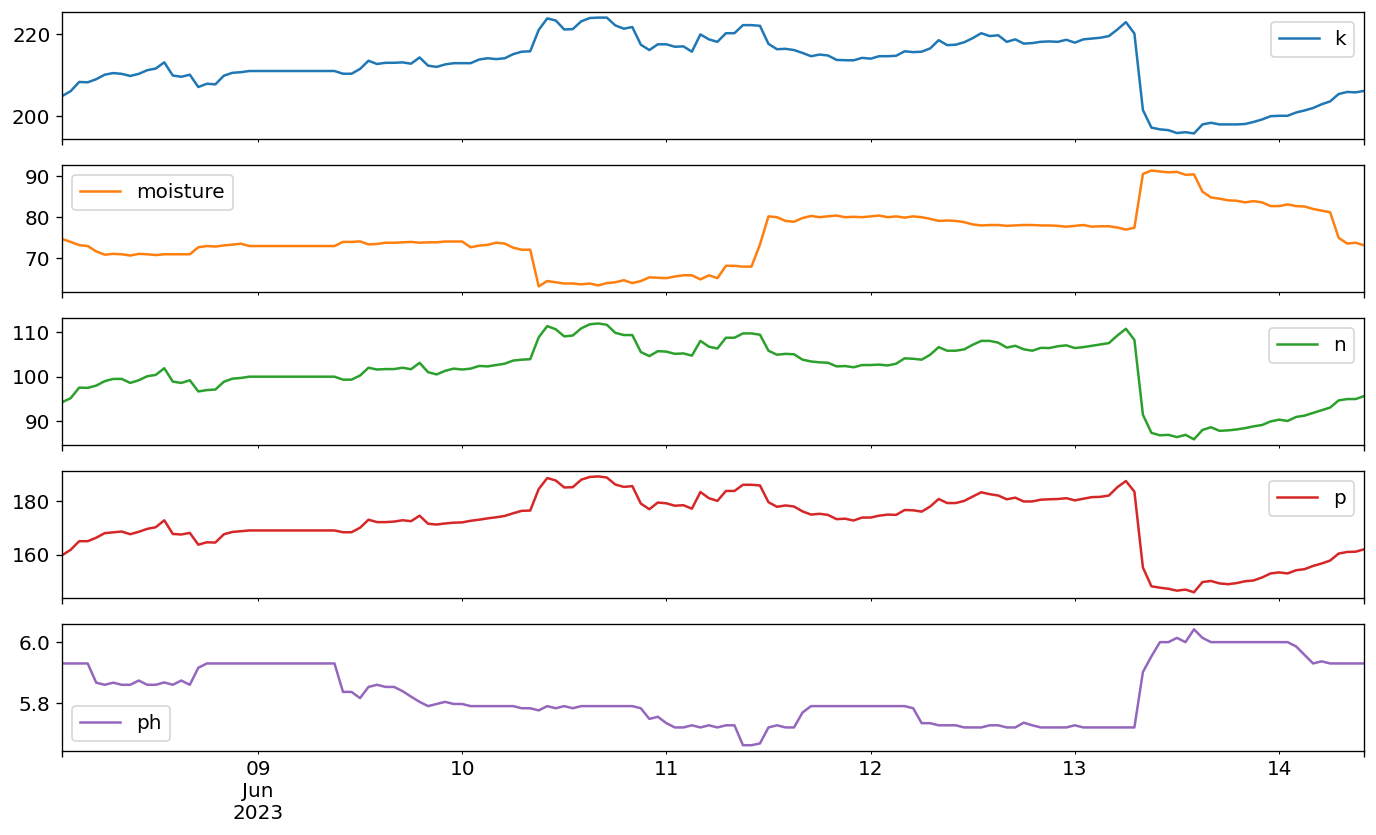

<Figure size 960x2880 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
df_filled.plot(subplots=True)
fig = plt.figure(figsize=(8, 24))
plt.show()

In [ ]:
df_filled.isna().sum()

k           0
moisture    0
n           0
p           0
ph          0
dtype: int64

In [ ]:
# Menghapus baris yang mengandung NaN pada kolom 'col1'
df_filled = df_filled.dropna(subset=['k'])

<Axes: >

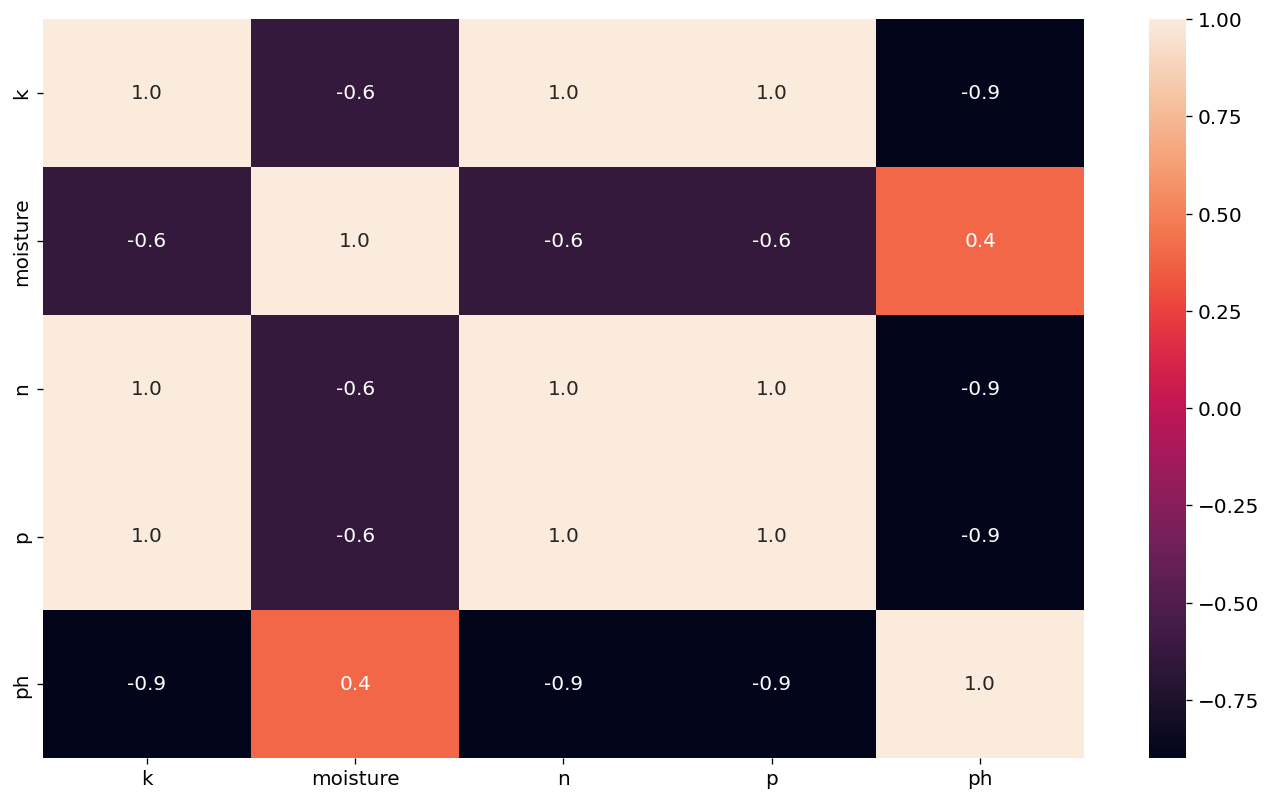

In [ ]:
import seaborn as sns
# plotting correlation heatmap
# Warna yang lebih terang menunjukkan korelasi yang lebih tinggi
sns.heatmap(df_filled.corr(), annot = True, fmt = ".1f")

In [ ]:
mois = df_filled['moisture']
# Menghilangkan kolom index dan mengubahnya menjadi series
mois = mois.reset_index(drop=True).squeeze()

In [ ]:
mois = pd.DataFrame(mois)